# 환경설정

In [ ]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.9.0+cu111


In [ ]:
# Install torch geometric
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install -q torch-geometric

     |████████████████████████████████| 10.4 MB 5.4 MB/s 
     |████████████████████████████████| 3.7 MB 4.5 MB/s 
     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 407 kB 37.5 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 


# 필요한 유틸 함수

In [ ]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

# Tensor
- 추가자료: [PyTorch로 시작하는 딥 러닝 입문  > 02. 텐서 조작하기(Tensor Manipulation) 1 ](https://wikidocs.net/52460)

In [ ]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.7128, 0.3010, 0.7852, 0.0134],
        [0.7644, 0.9181, 0.9650, 0.3593],
        [0.0641, 0.1802, 0.2761, 0.8493]])


In [ ]:
# Get the shape of the tensor
print(ones.shape)
print(ones.size())

torch.Size([3, 4])
torch.Size([3, 4])


In [ ]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


In [ ]:
ones = torch.ones(3, 4)
print(ones.size())

ones = torch.ones(3, 4).t()
print(ones.size())

torch.Size([3, 4])
torch.Size([4, 3])


# 실습 1: NX graph or PyTorch tensor
- 함수 `graph_to_edge_list`와 `edge_list_to_tensor`를 완성해봅시다.
- `edge_list_to_tensor`
    - `nx.Graph`를 받아서, 튜플의 리스트로 구성된 `edge_list`를 반환하는 함수 입니다. 여기서 튜플은 (부모노드의 인덱스, 자식노드의 인덱스)로 구성되어있으며, 해당 그래프 `G`의 edge는 `G.edges()`로 불러올 수 있습니다.
- `edge_list_to_tensor`
    - `edge_list_to_tensor`에서 반환된 `edge_list`를 LongTensor로 변환하여 반환하는 함수입니다. 반환된 `edge_index`의 size (shape)은 [2, `G.number_of_nodes()`] 여야 합니다.

In [ ]:
import networkx as nx
G = nx.karate_club_graph()

In [ ]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  ############# Your code here ############
  edge_list = [(es[0], es[1]) for es in G.edges()]
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  ############# Your code here ############
  edge_index = torch.tensor(edge_list, dtype=torch.long).t()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index dtype {}".format(pos_edge_index.dtype))
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

######### Expected Return ############
# The edge list dtype torch.int64
# The pos_edge_index tensor has shape torch.Size([2, 78])
# The pos_edge_index tensor has sum value 2535
######################################

The pos_edge_index dtype torch.int64
The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


# 실습 2: Edge Sampling 
- Link Prediction 용어 설명
    - Positive Edge: Graph에 존재하는 edge
    - Negeitve Edge: Graph에 존재하지 않는 edge


- 함수 `sample_negative_edges`를 완성해봅시다.
- `sample_negative_edges`
    - input: nx.Graph
    - input: num_neg_samples - 샘플링할 negative edge의 수
    - output: neg_edge_list - 튜플의 리스트, 앞서 완성한 `graph_to_edge_list`의 반환값과 동일하게, 튜플은 (부모노드의 인덱스, 자식노드의 인덱스)로 구성되어있습니다.
    - [주의] karate club graph는 undirected graph입니다. 즉, (0, 1)과 (1, 0)은 동일하니, neg_edge_list 리스트에 이러한 경우가 없이 모두 다른 edge로 구성되도록 코드를 완성해주세요.
    - [주의] self loop, 자기 자신를 향하는 edge(예, (0, 0)의 경우)도 제외합니다.
    - [팁] 위의 두가지 주의사항을 고려해서 `neg_edge_list`의 length가 `num_neg_samples`와 같을 때까지 `random.sample`을 이용해서 부모노드의 인덱스, 자식노드의 인덱스를 샘플링하는 방식으로 함수를 작성하시면 됩니다.
    - [팁] `G.neighbors(node_index)`를 사용하면 node_index를 지닌 노드의 이웃노드를 알 수 있습니다. 

In [ ]:
import random

def sample_negative_edges(G, num_neg_samples):
  neg_edge_list = []

  ############# Your code here ############
  pos_edge_list = graph_to_edge_list(G)
  node_list = list(range(G.number_of_nodes()))

  while len(neg_edge_list) != num_neg_samples:
      # do not consider self loop
      parent_es, child_es = random.sample(node_list, 2)
      if parent_es == child_es:
          continue
      # sample not exist edges
      parent_neigbor = G.neighbors(parent_es)
      child_neigbor = G.neighbors(child_es)
      if (child_neigbor not in parent_neigbor) and (parent_neigbor not in child_neigbor):
         neg_edge_list.append((parent_es, child_es))
  #########################################

  return neg_edge_list

neg_edge_list = sample_negative_edges(G, len(pos_edge_list))
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

######### Expected Return ############
# The neg_edge_index tensor has shape torch.Size([2, 78])
######################################

The neg_edge_index tensor has shape torch.Size([2, 78])


# Deep Learning Training Pipeline with PyTorch
- **모델 정의**
- 데이터셋 및 데이터로더 정의
- **훈련 루프 정의**
- 평가 루프 정의

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  
        
        out = self.classifier(h)

        return out, h

from torch_geometric.datasets import KarateClub
dataset = KarateClub()
data = dataset[0]

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


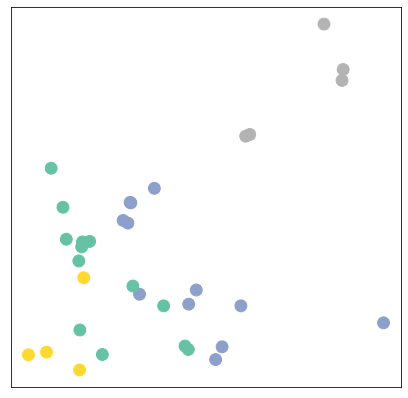

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

- 훈련 루프의 구성
    - `optimizer.zero_grad()`: gradients 초기화
    -  `out, h = model(data.x, data.edge_index)`: 모델의 input에 따른 output 구하기
    - `loss = criterion(out[data.train_mask], data.y[data.train_mask])`: loss function을 이용해서 모델의 output과 실제 traget 사이의 loss 값 구하기
    - `loss.backward()`: loss 값을 이용한 gradeient 계산
    - `optimizer.step()`: 계산된 gradeient를 이용해서 모델 파라미터 업데이트

In [ ]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

<IPython.core.display.Javascript object>

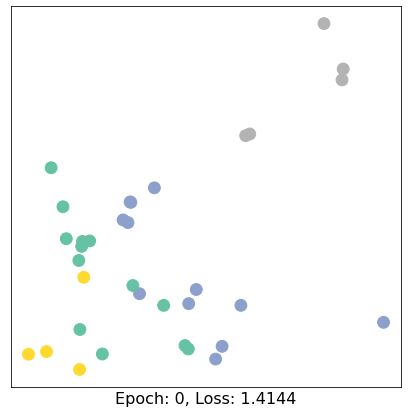

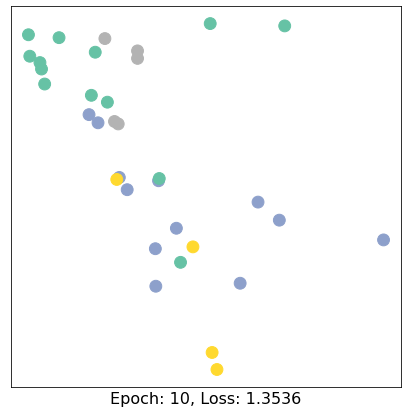

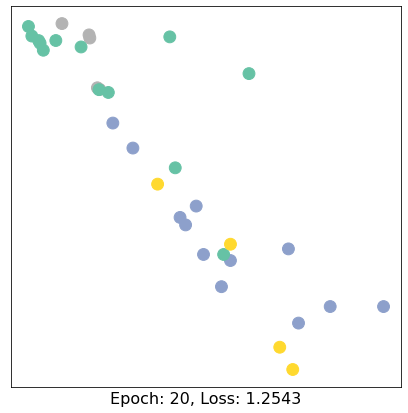

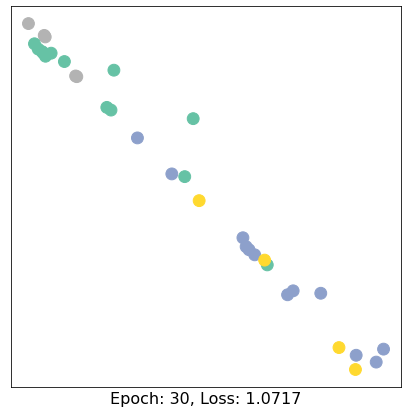

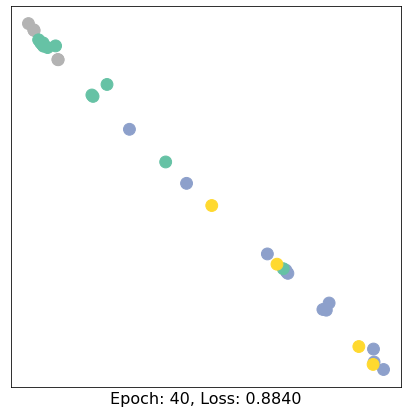

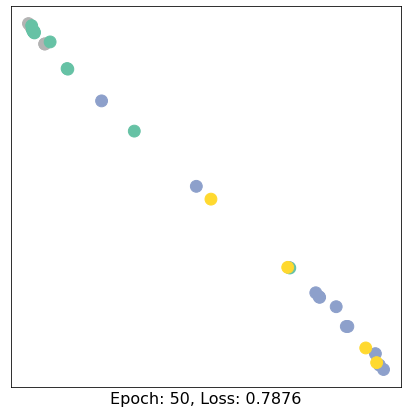

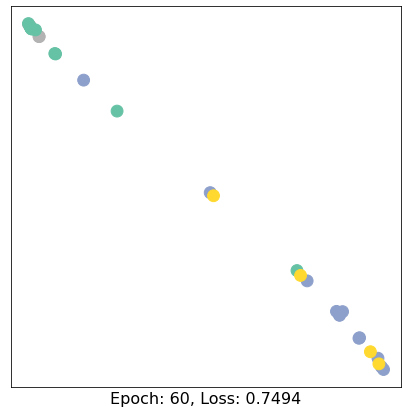

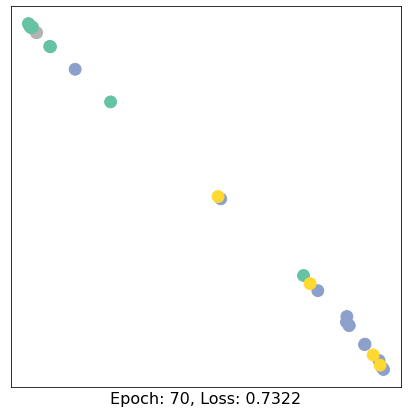

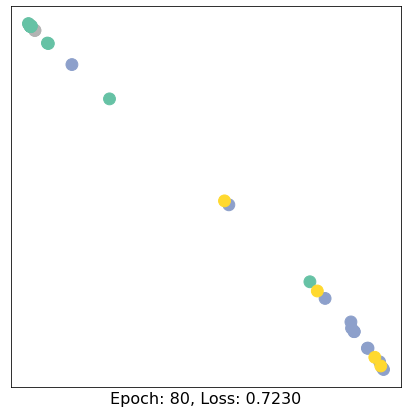

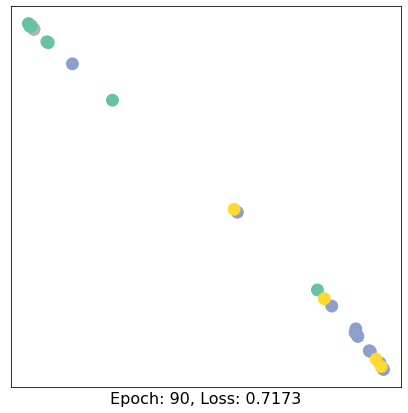

In [ ]:
num_epoch = 100

def train(data):
    optimizer.zero_grad() 
    out, h = model(data.x, data.edge_index)  
    loss = criterion(out[data.train_mask], data.y[data.train_mask]) 
    loss.backward()  
    optimizer.step()
    return loss, h

for epoch in range(num_epoch):
    loss, h = train(data)

    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

# Node Emebedding Learning



## Setup

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.9.0+cu111


In [ ]:
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [ ]:
id = torch.LongTensor([1])
print(emb_sample(id))

tensor([[-1.2811,  1.8633,  1.2098,  1.8366,  1.3099, -0.1392,  0.3324, -0.8042]],
       grad_fn=<EmbeddingBackward>)


In [ ]:
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

tensor([[-1.2811,  1.8633,  1.2098,  1.8366,  1.3099, -0.1392,  0.3324, -0.8042],
        [-0.6912, -1.4012,  0.0385, -0.3488,  0.5079, -1.9151,  0.3834, -1.7933]],
       grad_fn=<EmbeddingBackward>)


In [ ]:
shape = emb_sample.weight.data.shape
print(shape)

torch.Size([4, 8])


In [ ]:
emb_sample.weight.data = torch.zeros(shape)

In [ ]:
ids = torch.LongTensor([0, 2])
print(emb_sample(ids))

######### Expected Return ############
# tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<EmbeddingBackward>)
######################################

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<EmbeddingBackward>)


# 실습 4: Creating torch.nn.Embedding
- karate club graph를 위한 embedding을 정의해봅니다.
- karate club graph는 `G = nx.karate_club_graph()`로 불러와주세요.
- embedding의 size (shape)은 [num_nodes, 100]이 되도록 정의해주세요
- embedding의 초기값을 uniform distribution을 따르도록 셋팅해주세요.
- uniform distribution을 따르는 tensor를 만드는 방법은 "Tensor" 세션에서 이미 배웠습니다.

In [ ]:
torch.manual_seed(1) # 변경금지

def create_node_emb(num_node, embedding_dim):
  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand_like(emb.weight.data)
  #########################################

  return emb

num_node = G.number_of_nodes()
embedding_dim = 16
emb = create_node_emb(num_node, embedding_dim)

print("Embedding: {}".format(emb))
ids = torch.LongTensor([0, 3])
print(emb(ids))
######### Expected Return ############
# Embedding: Embedding(34, 100)
# tensor([[...]], grad_fn=<EmbeddingBackward>)
######################################

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


# Visualize the initial node embeddings

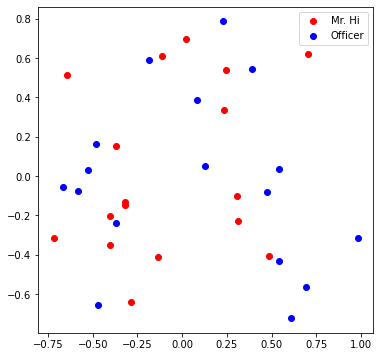

In [ ]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

# 실습 5: Training node embedding 
-  함수 `train`을 완성해봅시다.
- `train:`
    - emmbedding layer를 link prediction task를 통해 학습하는 함수입니다.
    - 해당 함수는 아래와 같이 작동합니다.
        - 1. `train_edge`에서 parent_node와 child_node 각각의 embeding 얻기
        - 2. parent_node의 embedding과 child_node의 dot product 수행하기
        - [팁] dot product `out = torch.sum(source_emb * target_es, dim=-1)`
        - 3. dot product 결과값을 sigmoid 모듈에 넣기
        - 4. sigmoid 결과값을 이용하여 loss 구하기


In [ ]:
from torch.optim import SGD
from tqdm.notebook import tqdm
import numpy as np

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  epochs = 1000
  learning_rate = 0.01

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
  num_batch = len(train_label)
  train_label = train_label.view(-1)
  pbar = tqdm(range(epochs))
  for i in range(epochs):
    source_es = train_edge[0]
    target_es = train_edge[1]
    ############# Your code here ############
    optimizer.zero_grad()
    source_emb = emb(source_es)
    target_emb = emb(target_es)
    out = torch.sum(source_emb * target_emb, dim=-1)
    logits = sigmoid(out)
    loss = loss_fn(logits, train_label)
    loss.backward()
    optimizer.step()
    #########################################

    pred = [1 if item > 0.5 else 0 for item in logits]
    num_match = (np.array(pred) == np.array(train_label)).sum()
    accu = num_match / len(train_label)

    pbar.set_description(f"Loss for Epoch {i}: {loss:.4f} | Accuracy for is Epoch {i}: {accu:.4f}")
    pbar.update()

  pbar.close()
  return emb

In [ ]:
from torch.optim import SGD
from tqdm.notebook import tqdm
import numpy as np

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  epochs = 1000
  learning_rate = 0.01

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
  num_batch = len(train_label)
  train_label = train_label.view(-1)
  pbar = tqdm(range(epochs))
  for i in range(epochs):
    source_es = train_edge[0]
    target_es = train_edge[1]
    ############# Your code here ############
    optimizer.zero_grad()
    source_emb = emb(source_es)
    target_emb = emb(target_es)
    out = torch.sum(source_emb * target_emb, dim=-1)
    logits = sigmoid(out)
    loss = loss_fn(logits, train_label)
    loss.backward() 
    optimizer.step()
    #########################################

    pred = [1 if item > 0.5 else 0 for item in logits]
    num_match = (np.array(pred) == np.array(train_label)).sum()
    accu = num_match / len(train_label)

    pbar.set_description(f"Loss for Epoch {i}: {loss:.4f} | Accuracy for is Epoch {i}: {accu:.4f}")
    pbar.update()

  pbar.close()
  return emb

In [ ]:
loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()


pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train_emb = train(emb, loss_fn, sigmoid, train_label, train_edge)

  0%|          | 0/1000 [00:00<?, ?it/s]

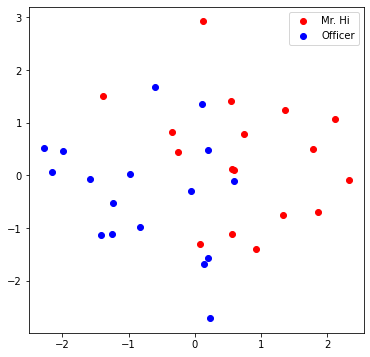

In [ ]:
visualize_emb(emb)

# 실습 6: Tuning node embedding 
- optimizer, epoch, learning rate를 바꾸면서 파라미터 튜닝을 세번 시도해본뒤, 각각 시도에 따른 임베딩 결과물을 시각화해보세요
- 마지막으로 어떤 파라미터로 했을 때, 결과가 좋았는데 간단하게 분석해서 제출합니다.